# Evaluation of Figure 1

In this notebook, the data for Figure 1 is prepared. Note, that due to known issues in the umap-learn package, the plots are not 100% reproducable over all machines. However the overall structure will be preserved.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scanpy as sc
import anndata
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../mvTCR/')
import tcr_embedding.utils_training as utils
import config.constants_10x as const

C:\Users\felix.drost\Anaconda3\envs\mvTCR_repro2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [5]:
from tcr_embedding.utils_preprocessing import encode_tcr

adata = utils.load_data('TIL/processed.h5ad')

len_beta = adata.obs['IR_VDJ_1_junction_aa'].str.len().max()
len_alpha= adata.obs['IR_VJ_1_junction_aa'].str.len().max()
pad = max(len_beta, len_alpha)

encode_tcr(adata, 'IR_VJ_1_junction_aa', 'IR_VDJ_1_junction_aa', pad)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(adata.obs['patient'].to_numpy().reshape(-1, 1))
adata.obsm['patient'] = enc.transform(adata.obs['patient'].to_numpy().reshape(-1, 1))

## Load model

In [9]:
def load_model(adata, weight):
    path_model = f'saved_models/journal_2/til/til_moe_{weight}.pt'
    model = utils.load_model(adata, path_model)
    return model
    

In [12]:
models = {
    w: load_model(adata, w) for w in [1, 5, 10]
}

latents = {}
for w, m in models.items():
    latent = m.get_latent(adata, metadata=[])
    latent.obs = adata.obs.copy()
    latents[w] = latent


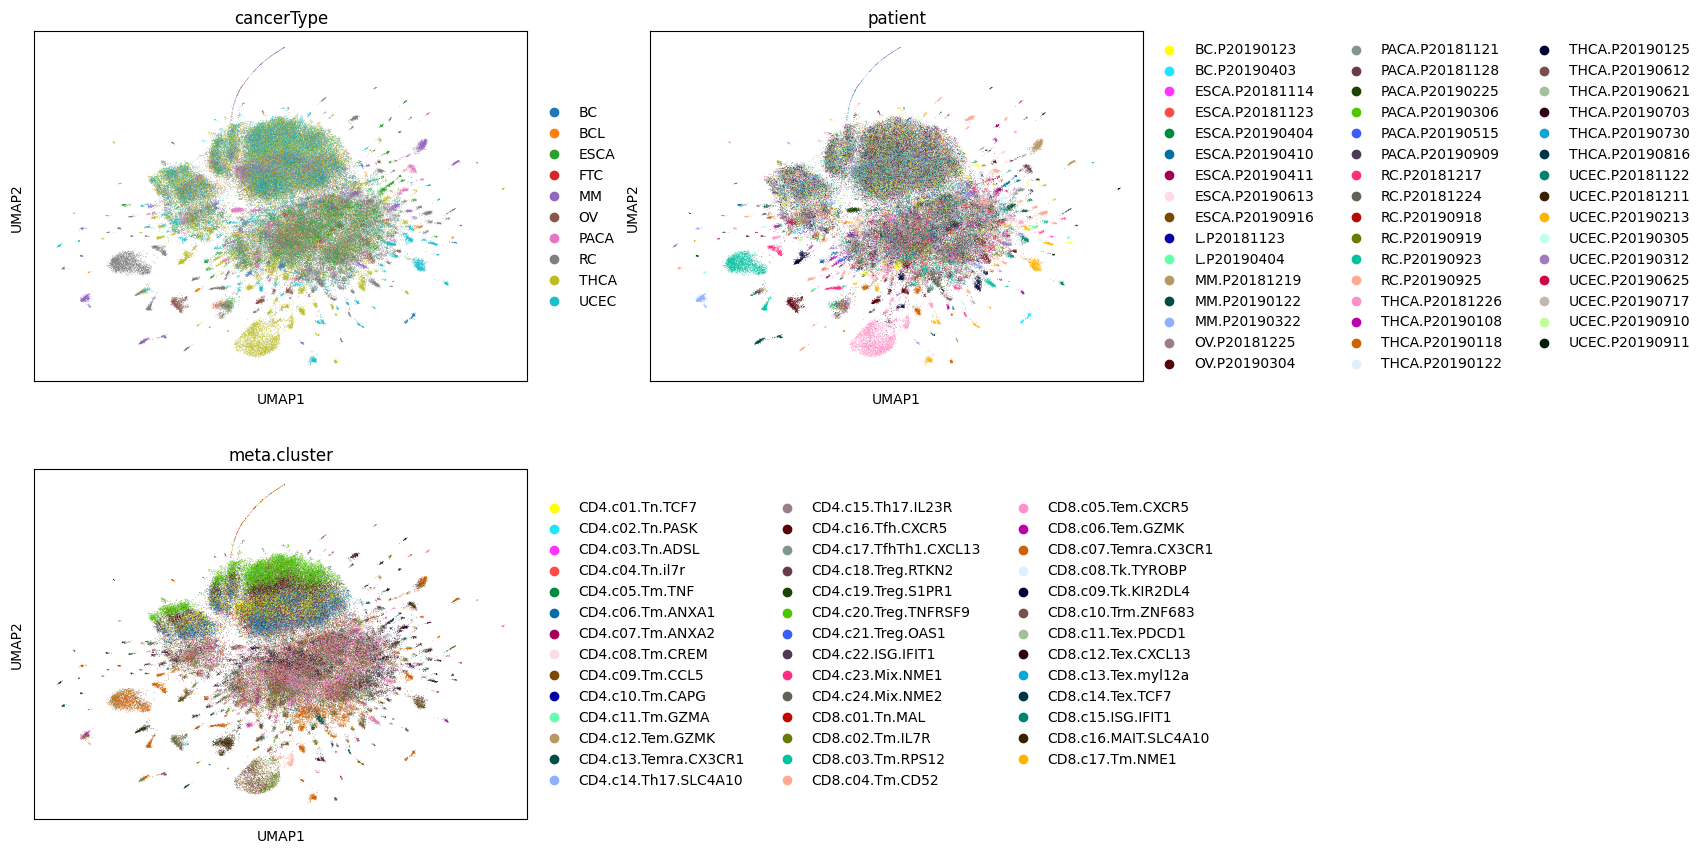

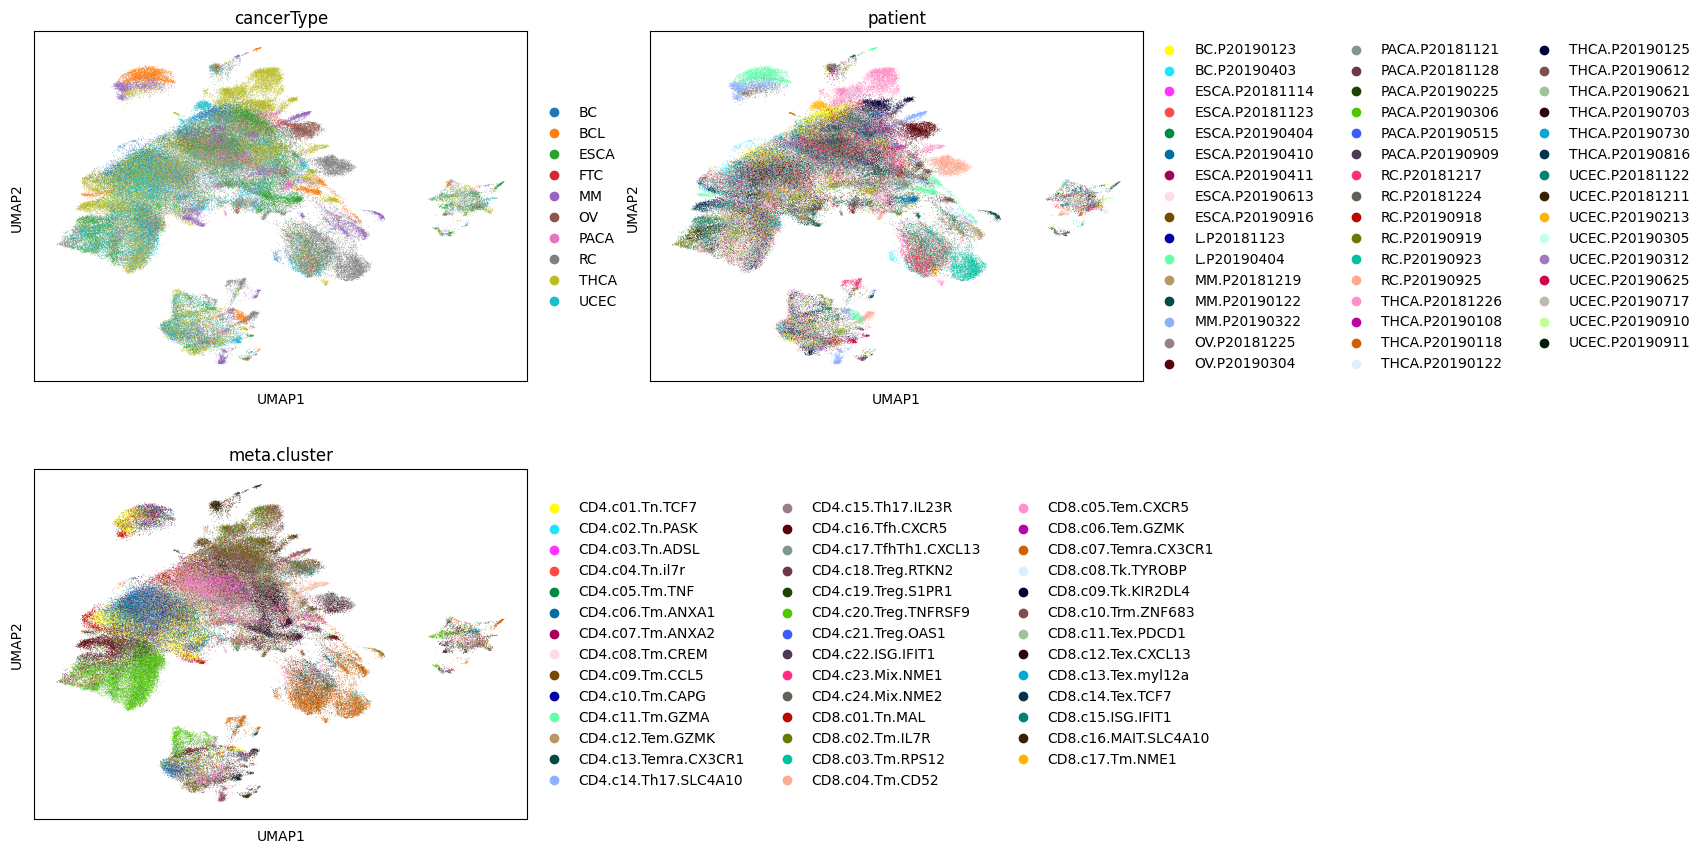

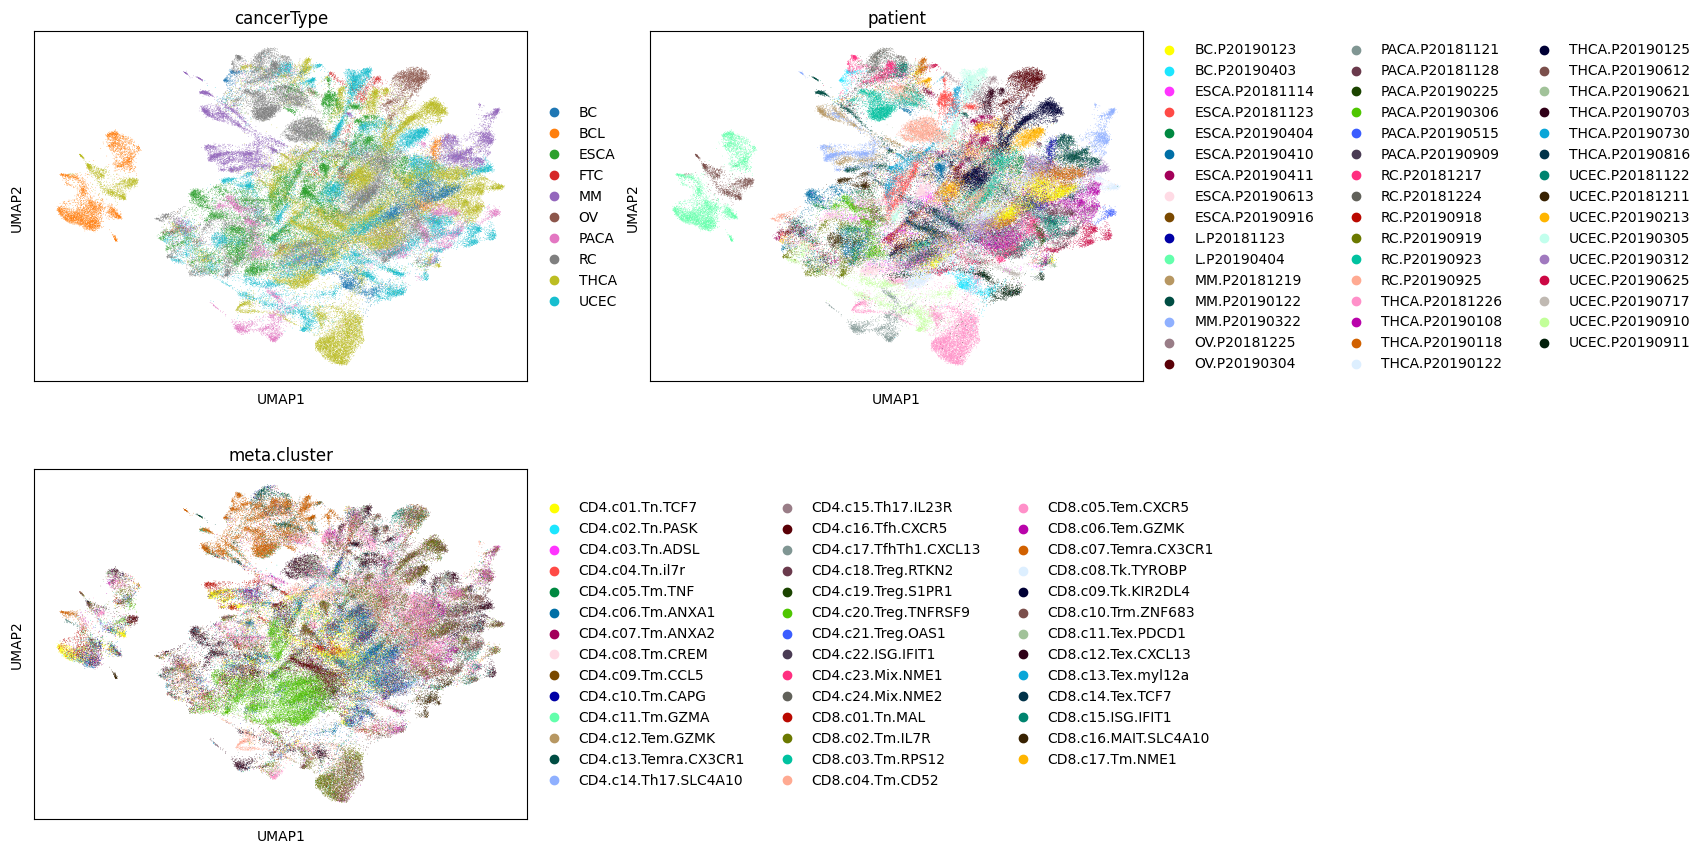

In [19]:
for w, l in latents.items():
    sc.pp.neighbors(l)
    sc.tl.umap(l)
    sc.pl.umap(l, color=['cancerType', 'patient', 'meta.cluster'], ncols=2)

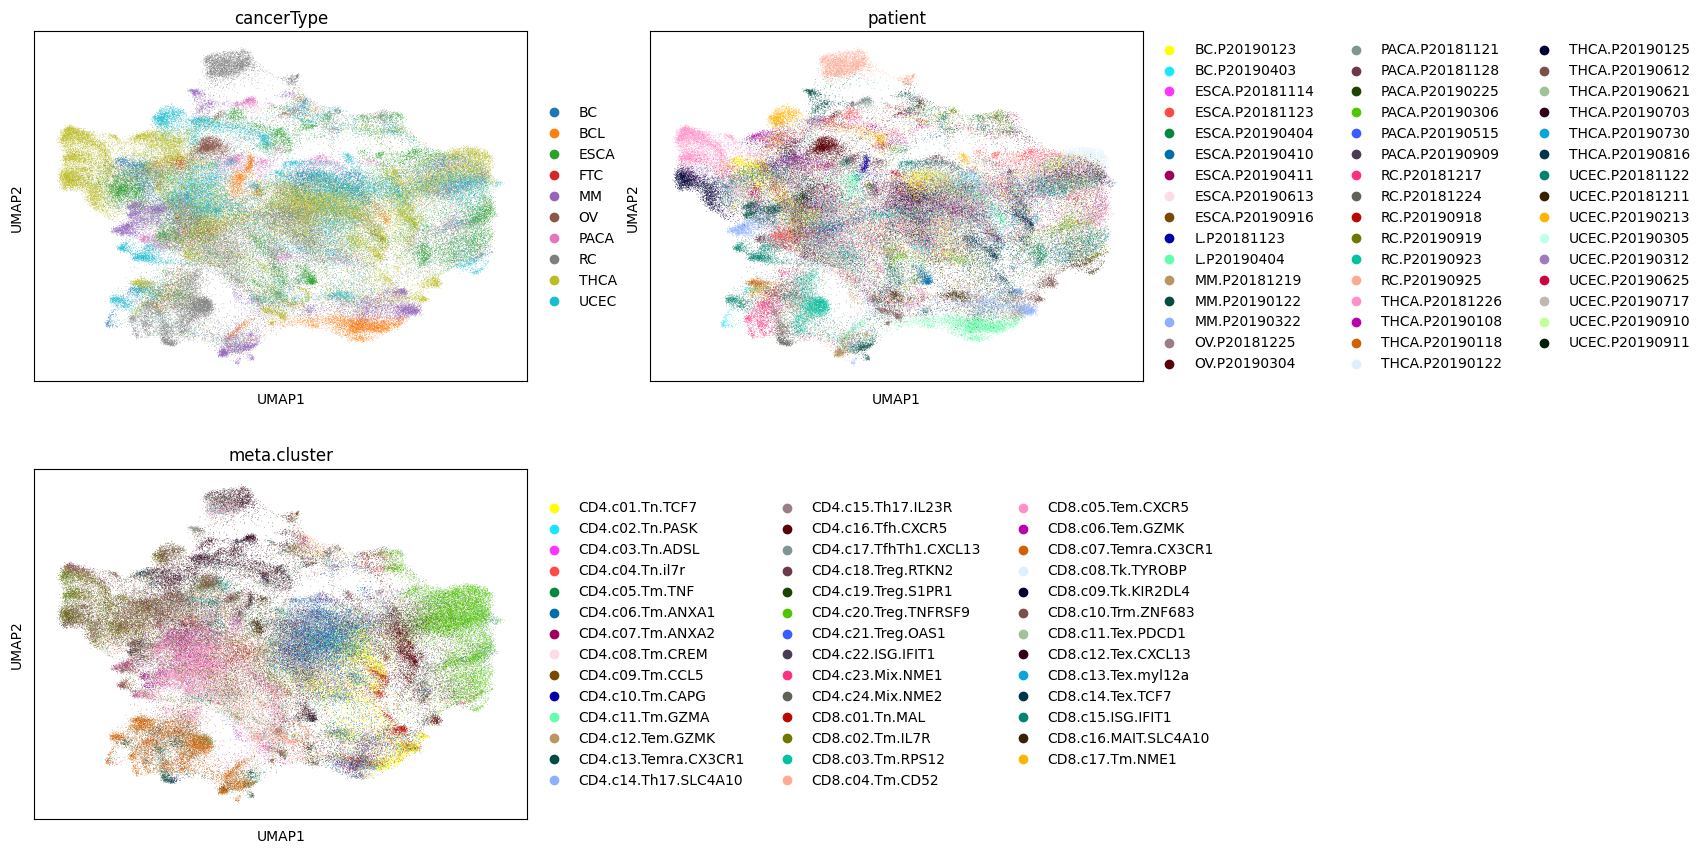

In [20]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cancerType', 'patient', 'meta.cluster'], ncols=2)